# PC 7 : Résolution numérique d'équations différentielles ordinaires

**<big> Préparation avant la PC :</big>**
**Les question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC.


In [3]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt
# Cette fonction renvoi le résultat des itérations de Newton
from scipy.optimize import newton

## Exercice 1 : Autour de Cauchy-Lipschitz

### Question 1 : Exemples et contrexemples

Pour chacun des systèmes ci-dessous, répondre aux questions suivantes. Existe-t-il une solution? Si oui, est-elle unique, et quel est l'intervalle maximal de définition?

\begin{align*}
&
\left\{
\begin{aligned}
y'(t) &= \text{sign}(y(t)) \sqrt{\vert y(t)\vert}, \\
y(0) &= 0,
\end{aligned}
\right.
\qquad{} 
&(a) \\ \\ 
& 
\left\{
\begin{aligned}
y'(t) &= y(t)^2, \\
y(0) &= 1,
\end{aligned}
\right.
\qquad{} &(b) \\ \\
& 
\left\{
\begin{aligned}
y'(t) &= -ty(t), \\
y(0) &= 1,
\end{aligned}
\right.
\qquad{} &(c) \\ \\
& 
\left\{
\begin{aligned}
y'(t) &= y(t)(y(t)-2)(y(t)-t), \\
y(0) &= 1,
\end{aligned}
\right.
\qquad{} &(d) \\ \\ 
&
\left\{
\begin{aligned}
y''(t) &= -y(t), \\
y(0) &= 1, \\
y'(0) &= -1,
\end{aligned}
\right.
\qquad{} & (e) \\ \\
&
\left\{
\begin{aligned}
y''(t) &= -y(t), \\
y(0) &= 1, \\
y(\pi) &= -1.
\end{aligned}
\right.
\qquad{}& (f)
\end{align*}

### Question 2 : Tests numériques

On considère un problème générale de la forme 

$$y' = f(t,y) $$

sur un intervale $t \in [0,T[$.

1) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
- Implémenter la méthode d'Euler explicite pour obtenir une solution approchée. On prendra les $t_n$ obtenus avec un pas uniforme $\Delta t = \frac{1}{N}$ avec $N=2^5$, puis $N=2^{10}$.
- Afficher sur un même graphique les solutions approchées obtenues pour un second membre $f(t,y) = y$, ainsi que la solution thérique.

*Indications pour l'implémentation :* 
- Vérifier que votre dernier temps $t_N$ est bien égal à $1$ et que $t_0$ est bien égale à $0$.
- Pour ce choix de fonction $f$, que valent les $y_n$? Vérifier que vous obtenez bien numériquement cette suite.


In [4]:
def f_1(t,x):
    return x

In [5]:
def Euler_explicite(f, y0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler explicite
    ----------   
    parametres:
    f   : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0 : valeur au temps t_0
    dt  : pas de temps (constant) 
    T_f : temps final
    
    valeurs de retour:
    tab_y : tableau contenant les valeurs y_n à chaque itération
    """
    N = round(T_f/dt)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        y[i + 1] = y[i] + dt*f(dt*i, y[i])
    return y

In [6]:
# Tests unitaire : 
# -construire les tn et vérifier que tN=1
# -vérifier la valeurs numérique des yn

T_f = 1
y0 = 1
N1 = 2**5
dt1 = T_f/N1
N2 = 2**10
dt2 = T_f/N2

assert N1*dt1 == T_f
assert N2*dt2 == T_f

y1_n = Euler_explicite(f_1, y0, dt1, T_f)
y2_n = Euler_explicite(f_1, y0, dt2, T_f)

print(f"For N = {N1}:\n{y1_n}")
print(f"For N = {N2}:\n{y2_n}")

For N = 32:
[1.         1.03125    1.06347656 1.09671021 1.1309824  1.1663256
 1.20277327 1.24035994 1.27912119 1.31909372 1.3603154  1.40282526
 1.44666355 1.49187178 1.53849278 1.58657068 1.63615101 1.68728073
 1.74000825 1.79438351 1.850458   1.90828481 1.96791871 2.02941617
 2.09283542 2.15823653 2.22568142 2.29523397 2.36696003 2.44092753
 2.51720651 2.59586922 2.67699013]
For N = 1024:
[1.         1.00097656 1.00195408 ... 2.71165694 2.71430504 2.71695573]


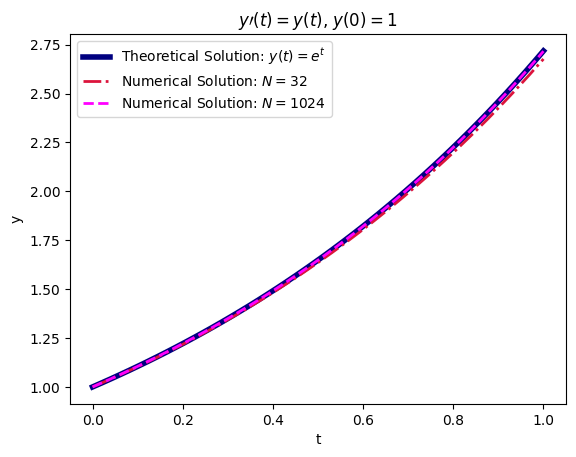

In [7]:
# Tracer la solution numérique avec les paramètres donnés et la solution théorique 

plt.plot(np.linspace(0, T_f), np.exp(np.linspace(0, T_f)), label='Theoretical Solution: $y(t) = e^t$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N1 + 1), y1_n, label=f'Numerical Solution: $N = {N1}$', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N2 + 1), y2_n, label=f'Numerical Solution: $N = {N2}$', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$y\\prime(t) = y(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

2) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
Utiliser maintenant le schéma d'Euler explicite et le tester sur les cas (a) et (b) avec $\Delta t = 2^{-10}$ et $T_f = 1$. Tracer les solutions obtenues, et commenter.

In [8]:
def f_a(t,x):
    # fonction second membre dans (a)
    return np.sign(x)*np.sqrt(np.abs(x))

def f_b(t,x):
    # fonction second membre dans (b)
    return x**2

def f_c(t,x):
    # fonction second membre dans (c)
    return -t*x

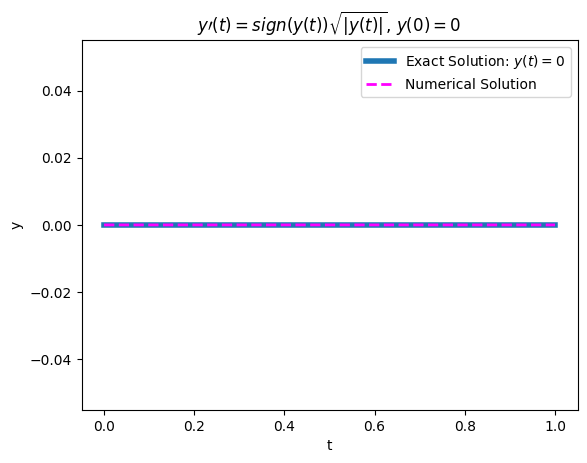

In [9]:
# Tracer la solution numérique avec les paramètres donnés dans le cas a
T_f = 1
dt = 2**(-10)
y0 = 0

ya_n = Euler_explicite(f_a, y0, dt, T_f)


plt.plot([0, T_f], [0, 0], label='Exact Solution: $y(t) = 0$', linewidth=4)
plt.plot(np.linspace(0, T_f, len(ya_n)), ya_n, label=f'Numerical Solution', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$y\\prime(t) = sign(y(t))\\sqrt{|y(t)|}$, $y(0) = 0$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()


**Réponse :**



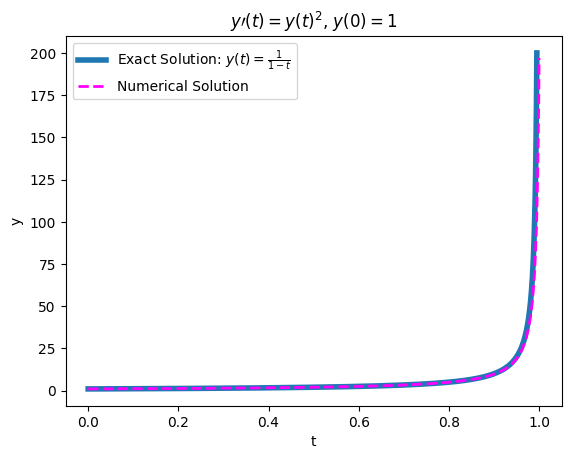

In [10]:
# Tracer la solution numérique avec les paramètres donnés dans le cas b
T_f = 1
dt = 2**(-10)
y0 = 1

yb_n = Euler_explicite(f_b, y0, dt, T_f)


plt.plot(np.linspace(0, T_f - 5e-3, 1000), 1/(1 - np.linspace(0, T_f - 5e-3, 1000)), label='Exact Solution: $y(t) = \\frac{1}{1 - t}$', linewidth=4)
plt.plot(np.linspace(0, T_f, len(yb_n)), yb_n, label=f'Numerical Solution', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$y\\prime(t) = y(t)^2$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()


**Réponse :** 

3) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
Utiliser maintenant le schéma d'Euler explicite et le tester sur le cas (c) avec $T_f = 3$ et $\Delta t=2^{-5}$. Tracer la solution obtenue ainsi que la solution exacte.

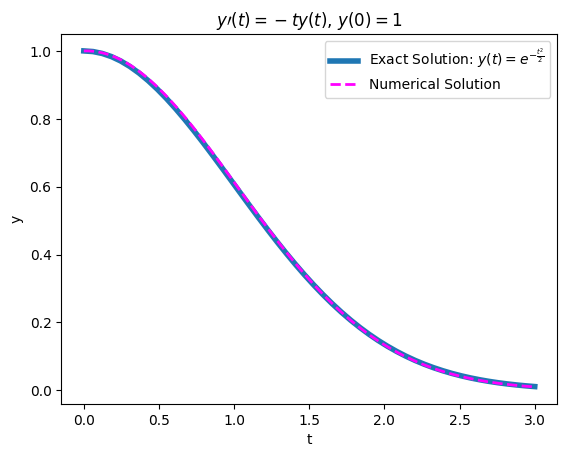

In [11]:
# Tracer la solution numérique avec les paramètres donnés dans le cas c

T_f = 3
dt = 2**(-5)
y0 = 1

yc_n = Euler_explicite(f_c, y0, dt, T_f)


plt.plot(np.linspace(0, T_f), np.exp(-(np.linspace(0, T_f)**2)/2), label='Exact Solution: $y(t) = e^{-\\frac{t^2}{2}}$', linewidth=4)
plt.plot(np.linspace(0, T_f, len(yc_n)), yc_n, label=f'Numerical Solution', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$y\\prime(t) = -ty(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

## Exercice 2 : Consistance + stabilité $\Rightarrow$ convergence

>On considère $f\in\mathcal{C}^0(\mathbb{R}^2,\mathbb{R})$ localement lipschitzienne en la deuxième variable, et le problème de Cauchy
>
>\begin{equation*} \left\{\begin{aligned} 
&y'(t) = f(t,y(t)) \\
&y(t_0)=y_0, 
\end{aligned}\right. \qquad{} (1) \end{equation*}
>
>qu'on cherche à résoudre numériquement. Dans tout cet exercice, on considère uniquement la méthode d'Euler explicite, donnée par
>
>\begin{equation*}  y_{n+1} = y_n + (t_{n+1} - t_n)f(t_n,y_n). \end{equation*}
>
>Les différentes notions et résultats qui vont être établis se généralisent à d'autres méthodes vues en cours.
>On démontrera en particulier une partie du *théorème de Lax*, qui affirme que si un schéma est consistant, sa stabilité est une condition nécessaire et suffisante pour qu'il soit convergent.
>
>Étant donnée une subdivision $t_0<t_1<\ldots<t_{N}$, on note $\Delta t_n=t_{n+1}-t_n$.
>
>*Pour simplifier certaines questions, on pourra supposer que $f$ est de classe $\mathcal{C}^1$.*

### Question 1 : Consistance

>**Définitions :** Étant donnée une solution $y$ de (1) définie sur $[t_0,t_0+T]$, et une subdivision $t_0<t_1<\ldots<t_{N}=t_0+T$, on note pour tout $0\leq n< N$
>
>\begin{equation*} \varepsilon_n = y(t_{n+1})-y(t_n)-\Delta t_n f(t_n,y(t_n)), \end{equation*}
>
>c'est-à-dire l'erreur obtenue lorsqu'on applique le schéma numérique à la solution exacte $y$ aux points $t_n$, et on définit l'**erreur de consistance** $E$ comme
>
>\begin{equation*} E = \sum_{n=0}^{N-1}\left\vert \varepsilon_n\right\vert. \end{equation*}
>
>On dit que la méthode d'Euler explicite est **consistante** si $E\underset{\Delta t\to 0}{\longrightarrow} 0$ où $\Delta t=\max\limits_{0\leq n\leq N} \Delta t_n$. 
 
1) Dans le cas où $f$ est de classe $\mathcal{C}^1$, montrer que l'erreur de consistance est en $O(\Delta  t)$, et donc que la méthode d'Euler explicite est consistante.

2) Montrer qu'elle demeure consistante si $f$ satisfait seulement les conditions de Cauchy (continuité et Lipschité-continuité par rapport à $y$).

### Question 2 : Stabilité

>**Définition :** On dit que le schéma d'Euler explicite est **stable** s'il existe une constante $C>0$ qui reste bornée quand $\Delta t$ tend vers $0$, telle que, pour toute suite $\left(z_i\right)_{1\leq i\leq N}$ vérifiant
>
>\begin{equation*}z_{n+1}=z_n+\Delta t_n f(t_n,z_n)+\delta_n, \qquad{} \forall~0\leq n<N,\end{equation*}
>
>on ait
>
>\begin{equation*} \max\limits_{0\leq n\leq N}\left\vert y_n-z_n\right\vert \leq C\left(\left\vert y_0-z_0\right\vert + \sum_{n=0}^{N-1}\left\vert \delta_n\right\vert\right), \end{equation*}

1) **Lemme de Gronwall discret :** Soit $\left(\theta_n\right)$ une suite de nombre réels positifs et $L>0$ tels que

\begin{equation*} \theta_{n+1}\leq (1+Lh_n)\theta_n+\left\vert \delta_n\right\vert,\qquad\forall n\geq 0. \end{equation*}

Montrer que

\begin{equation*} \theta_n\leq e^{L(t_n-t_0)}\theta_0 + \sum_{i=0}^{n-1}e^{L(t_n-t_{i+1})}\left\vert \delta_i\right\vert. \end{equation*}

2) En déduire que, si $f$ est globalement lipschitzienne en la deuxième variable, la méthode d'Euler explicite est stable.

### Question 3 : Convergence 

On dit que le schéma d'Euler explicite est convergent si l'erreur globale

$$e_n := \max\limits_{0\leq n\leq N}\left\vert y(t_n)-y_n \right\vert \underset{\Delta t\to 0}{\longrightarrow} 0.$$

En supposant $f$ globalement lipschitzienne en la deuxième variable, utiliser les deux questions précédentes pour montrer que la méthode d'Euler explicite converge. Dans le cas où $f$ est de classe $\mathcal{C}^1$, montrer que  $e_n = O(\Delta t)$.


### Question 4 :

On revient sur le problème de la forme (1) avec $f(t,y) = y$, $t_0=0$, $y_0=1$ et $T=1$.

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 
Connaissant la solution exacte $y(t)$, calculer l'erreur globale $e_n = \max\limits_{0\leq n\leq N}\left\vert y(t_n)-y_n \right\vert$ pour $N=2^i$ avec $i$ entier allant de 5 à 10, et vérifier numériquement que cette erreur est proportionelle à $\Delta t = \frac{1}{N}$.

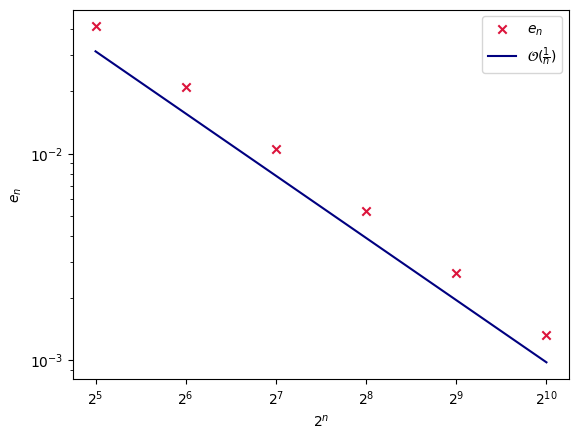

In [12]:
# Tracer la courbe d'erreur global en fonction de N en échelle log-log
T_f = 1
y0 = 1

ns = 2**np.arange(5, 11, dtype=np.int64)

error_n = [np.max(np.abs(Euler_explicite(f_1, y0, T_f/n, T_f) - np.exp(np.linspace(0, T_f, n + 1)))) for n in ns]

plt.scatter(ns, error_n, color='crimson', marker='x', label='$e_n$')
plt.plot([2**5, 2**10], [2**(-5), 2**(-10)], color='navy', label='$\\mathcal{O}(\\frac{1}{n})$')
plt.semilogx(base=2)
plt.semilogy(base=10)
plt.xlabel('$2^n$')
plt.ylabel('$e_n$')
plt.legend()
plt.show()


## Exercice 3 : Euler implicite et différentes notions de stabilité

On s'intéresse dans un premier temps au comportement du schéma d'Euler implicite, puis on compare son comportement à celui du schéma d'Euler explicite.

**<big> Partie 1 : Euler implicite</big>**

### Question 1

$1$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Implémenter le schéma d'Euler implicite pour le problème 

$$ \left\{ \begin{array}{rl} y'(t) &= f\left(t, y(t)\right),\\ y(0) &= y_0. \qquad{}\end{array}\right. $$

*Indication pour l'implémentation :* On utilisera un algorithme de Newton pour la résolution de l'équation non-linéaire scalaire satisfaite par les $y_{n+1}$ que l'on initialisera avec la valeur de $y_n$. On initialisera l'algorithme par la valeur de $y_n$ et on fixera par défaut une tolérance $TOL=10^{-12}$ sur le résidu $|f(x)|$ et un nombre maximal $N_{\max}=100$ d'itérations dans cet algorithme. 

**Attention :** *Si la tolérance n'est pas atteinte à la dernière itération, votre algorithme devra renvoyer un message d'avertissement.*

Pour ce faire, on pourra pour cela 
- soit implémenter (exploiter l'implémentation de la PC5) un algorithme de Newton scalaire en implémentant le message en cas de non-convergence, 
- soit utiliser la fonction *newton* de scipy.optimize (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) avec les options 
    - *tol* qui fixe la tolérance
    - *maxiter* qui fixe le nombre maximum d'itérations
    - *fprime* qui donne la fonction dérivé à l'algorithme,
    - *full_output=True* qui impose à l'algorithme de renvoyer (x, r) où x est le zéro approché à la dernière itération et r est un objet contenant les informations de convergence. En particulier r.converged est True si l'algorithme a atteint la convergence et False sinon
    - disp=False qui empêche l'algorithme de s'arrêter en cas de non-convergence.
    
$2$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Tester cet algorithme sur la fonction de l'exercice 1, $f(t,y) = y$ avec $t_0=0$, $y_0=1$ et $T=1$ et $N=2^{5}$ pas de temps et comparer avec la solution exacte. 

$3$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Comme pour le schéma explicite, la solution numérique $y_n$ donnée par le schéma implicite avec ce second membre a une forme simple. Que valent les $y_n$ ? Vérifier que votre solution numérique est bien identique à celle-ci.

In [15]:
def Newton_scalaire(f, df, x0, tol=1.e-12, N_max=100):
    """
    Calcule une solution approchée du problème f(x)=0 par la méthode de Newton
    ----------   
    parametres:
    f      : fonction dont on cherche le zero
    df     : fonction dérivée de f
    x_0    : valeur initiale de la suite
    tol    : on utilise | f(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    x  : x_n à la dernière itération
    
    !!! afficher un message d'avertissement si on n'a pas convergé (si on n'a pas | g(x) | < tol) !!!
    """  
    x, r = newton(f, x0, df, tol=tol, maxiter=N_max, disp=False, full_output=True)
    if not r.converged:
        print("Warning! Did not converge.")
    return x

In [17]:
# Cellule de test pour valider votre fonction Newton_scalaire (voir tests unitaires de la PC5)
# ou pour tester scipy.optimize.newton

x = Newton_scalaire(f=lambda x: x**2, df=lambda x: 2*x, x0=2)

assert np.abs(x**2) < 1.e-12

x = Newton_scalaire(f=lambda x: x**2 + 1, df=lambda x: 2*x, x0=2)


Warning! Did not converge.


In [19]:
def Euler_implicite(f, df, y0, dt, T_f):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler implicite
    ----------   
    parametres:
    f       : fonction second membre (dépend de y et de t)
    df      : fonction dérivée de f (dépend de y et de t)
    y_0     : valeur au temps t_0
    dt      : pas de temps
    T_f     : temps final
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """ 
    N = round(T_f/dt)
    tab_y = np.zeros(N + 2)
    i = 0
    tab_y[i] = y0

    # --- Bloc à modifier et à placer dans votre fonction ---
    # construire la fonction satisfaite par y_n+1 et sa dérivée à partir de f et df
    def g(x):
        return tab_y[i - 1] - x + dt*f(i*dt, x)
    def dg(x):
        # dérivée de la fonction dont on cherche le zéro 
        return -1. + dt*df(i*dt, x)
    # --- Fin du bloc ---
    
    for i in range(1, N + 1):
        tab_y[i] = Newton_scalaire(g, dg, tab_y[i - 1])
    
    return tab_y[:N + 1]

In [20]:
def f_1(t, y):
    # fonction second membre
    return y

def df_1(t, y):
    # fonction dérivée de f_1 en fonction de y
    return 1

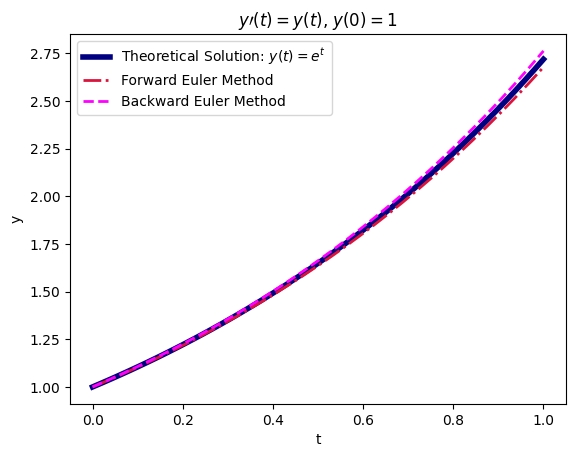

In [23]:
# Tracer la solution numérique obtenu avec le schéma d'Euler implicite
# Comparer à la solution exacte 
# Comparer à la reformulation simple dans le cas de la fonction f1  

T_f = 1
y0 = 1
N = 2**5
dt = T_f/N

y_n_explicite = Euler_explicite(f_1, y0, dt, T_f)
y_n_implicite = Euler_implicite(f_1, df_1, y0, dt, T_f)

plt.plot(np.linspace(0, T_f), np.exp(np.linspace(0, T_f)), label='Theoretical Solution: $y(t) = e^t$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N + 1), y_n_explicite,label=f'Forward Euler Method', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N + 1), y_n_implicite, label=f'Backward Euler Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title('$y\\prime(t) = y(t)$, $y(0) = 1$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

**<big> Partie 2 : A-stabilité</big>**

### Question 2 : Équation logistique

On va maintenant tester cet algorithme sur l'équation logistique

$$\left\{
    \begin{aligned}
        y'(t) &= ky(t)(1-y(t)) \\
        y(0) &= y_0,
    \end{aligned}
\right. \qquad{} (3)$$

où $k$ est une constante positive.

$1$. Vérifier que la solution est bien donnée par

$$ y(t) =  \frac{y_0 e^{kt}}{y_0 \left(e^{kt}-1\right) +1}. $$

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Tester votre algorithme d'Euler implicite sur l'exemple (3), avec $k=30$, $t_0=0$, $y_0=2$, $T=2$ et $\Delta t = 2^{-5}$, et afficher le résultat obtenu, ainsi que la solution théorique. Comparer avec le résultat donné par la méthode d'Euler explicite.


In [26]:
def f_2(t, y, k):
    # fonction second membre
    return k*y*(1-y)

def df_2(t, y, k):
    # fonction dérivée de f_2 en fonction de y
    return k*(1 - 2*y)

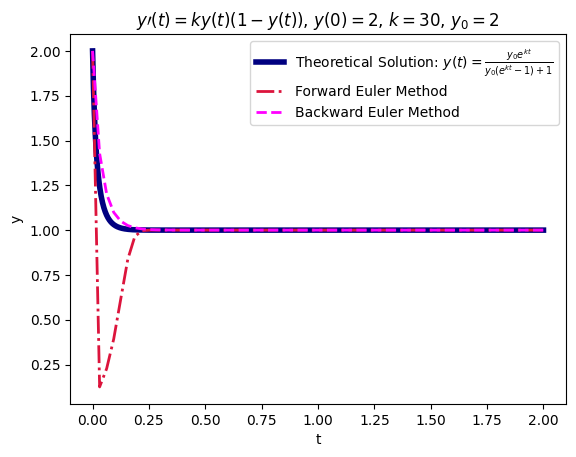

In [34]:
# Tracer la solution numérique donnée par les schémas d'Euler implicite et explicite
# avec les paramètres donnés pour la fonction 
# Comparer avec la solution exacte

def y2_exact(t, k, y0):
    return y0*(np.exp(k*t))/(y0*(np.exp(k*t) - 1) + 1)

T_f = 2
y0 = 2
dt = 2**(-5)
N = round(T_f/dt)
k = 30

y2_n_explicite = Euler_explicite(lambda t, x: f_2(t, x, k), y0, dt, T_f)
y2_n_implicite = Euler_implicite(lambda t, x: f_2(t, x, k), lambda t, x: df_2(t, x, k), y0, dt, T_f)

plt.plot(np.linspace(0, T_f, 1000), y2_exact(np.linspace(0, T_f, 1000), k, y0), label='Theoretical Solution: $y(t) = \\frac{y_0e^{kt}}{y_0(e^{kt} -1 ) + 1}$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N + 1), y2_n_explicite,label=f'Forward Euler Method', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N + 1), y2_n_implicite, label=f'Backward Euler Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title(f'$y\\prime(t) = ky(t)(1 - y(t))$, $y(0) = 2$, $k={k}$, $y_0={y0}$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()


### Question 3 : A-stabilité
>Un schéma numérique est dit *A-stable*, si lorsqu'on l'applique à l'équation
>
>\begin{equation*}  \left\{  \begin{aligned}
      y'&=\lambda y, \\
      y(0)&=1,
    \end{aligned} \right. 
\qquad{} (2)
\end{equation*}
>
>avec $\Re(\lambda)<0$, alors la suite $\vert y_n\vert $ décroit vers $0$.
>
>Ce critère de A-stabilité a donc un sens uniquement pour les systèmes dissipatifs. Lors de la simulation de problèmes physiques, il arrive souvent que le système soit dissipatif seulement dans un certain régime. C'est également le cas à la question suivante.

1) Ecrire explicitement les suites données par les méthodes d'Euler explicite et implicite appliquées à (2).

2) **Euler implicite :** 

a) *$\lambda \in \mathbb{R}_{-}^{*}$ réel et strictement négatif* : 
Montrer que le schéma d'Euler implicite est A-stable (sans condition sur $\Delta t$).

b) *$\lambda \in \mathbb{R}_{+}^{*}$ réel et strictement positif* : 
Distinguer différents régimes en fonction de $\Delta t$ et $\lambda$, pour lesquels la méthode d'Euler implicite donne des résultats qualitativement différents (croissance, décroissance, limite, oscillations...) en comparaison de la solution exacte.

3) **Euler explicite :**

a) *$\lambda \in \mathbb{R}_{-}^{*}$ réel et strictement négatif* : 
Montrer que la méthode d'Euler explicite est seulement *conditionnellement* A-stable, c'est-à-dire qu'elle est A-stable seulement si le pas $\Delta t$ respecte une certaine condition liée à $\lambda$.
Distinguer différents régimes en fonction de $\Delta t$ et $\lambda$, pour lesquels la méthode d'Euler explicite donne des résultats qualitativement différents (croissance, décroissance, limite, oscillations...) en comparaison de la solution exacte.

b) *$\lambda \in \mathbb{R}_{+}^{*}$ réel et strictement positif* : 
Montrer que la suite des $y_n$ donnée schéma d'Euler explicite est strictement croissante (sans condition sur $\Delta t$).

### Question 4 : Une illustration sur un modèle jouet

On considère toujours l'équation logistique (3), cette fois-ci avec $y_0=0.0001$ (et toujours $t_0=0$, $T=2$ et $\Delta t = 2^{-5}$). 

$1$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Utiliser les algorithmes d'Euler explicite et implicite, d'abord pour $k=30$, puis pour $k=50$, et enfin pour $k=70$. Afficher les solutions obtenues (et la solutions théorique correspondante).

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** En faisant le parallèle avec le comportement des méthodes d'Euler explicites et implicites pour les équations $y'=ky$ et $y'=-ky$ étudiés à la question 2, expliquer le comportement des solutions numériques avec les deux schémas. 

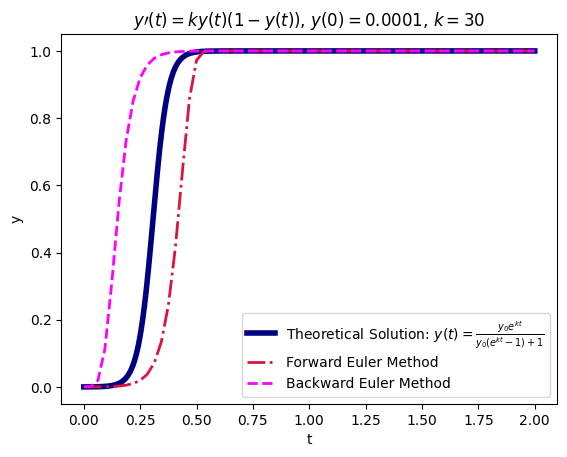

In [69]:
# Tracer les solutions numériques donnée par les schémas d'Euler implicite et explicite pour k=30
# Comparer avec la solution exacte
T_f = 2
y0 = 0.0001
dt = 2**(-5)
N = round(T_f/dt)
k = 30

y2_n_explicite = Euler_explicite(lambda t, x: f_2(t, x, k), y0, dt, T_f)
y2_n_implicite = Euler_implicite(lambda t, x: f_2(t, x, k), lambda t, x: df_2(t, x, k), y0, dt, T_f)

plt.plot(np.linspace(0, T_f, 1000), y2_exact(np.linspace(0, T_f, 1000), k, y0), label='Theoretical Solution: $y(t) = \\frac{y_0e^{kt}}{y_0(e^{kt} -1 ) + 1}$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N + 1), y2_n_explicite,label=f'Forward Euler Method', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N + 1), y2_n_implicite, label=f'Backward Euler Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title(f'$y\\prime(t) = ky(t)(1 - y(t))$, $y(0) = {y0}$, $k={k}$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()



**Réponse :** 

Warning! Did not converge.


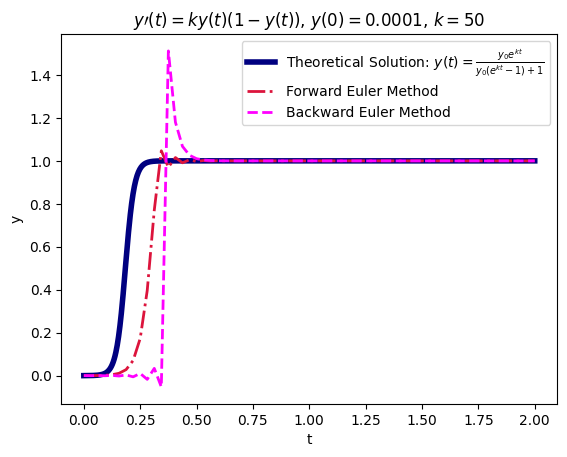

In [70]:
# Tracer les solutions numériques donnée par les schémas d'Euler implicite et explicite pour k=50
# Comparer avec la solution exacte
T_f = 2
y0 = 0.0001
dt = 2**(-5)
N = round(T_f/dt)
k = 50

y2_n_explicite = Euler_explicite(lambda t, x: f_2(t, x, k), y0, dt, T_f)
y2_n_implicite = Euler_implicite(lambda t, x: f_2(t, x, k), lambda t, x: df_2(t, x, k), y0, dt, T_f)

plt.plot(np.linspace(0, T_f, 1000), y2_exact(np.linspace(0, T_f, 1000), k, y0), label='Theoretical Solution: $y(t) = \\frac{y_0e^{kt}}{y_0(e^{kt} -1 ) + 1}$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N + 1), y2_n_explicite,label=f'Forward Euler Method', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N + 1), y2_n_implicite, label=f'Backward Euler Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title(f'$y\\prime(t) = ky(t)(1 - y(t))$, $y(0) = {y0}$, $k={k}$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

**Réponse :** 

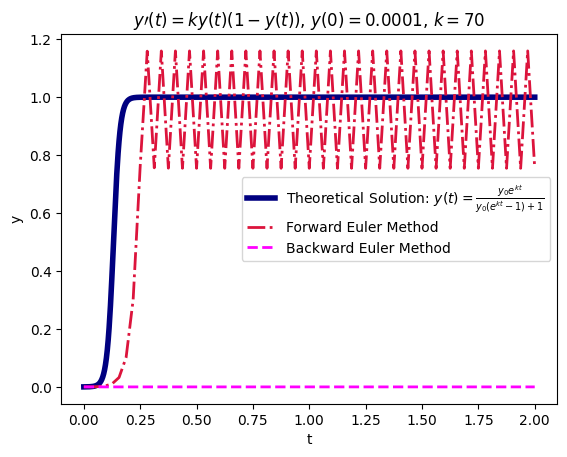

In [71]:
# Tracer les solutions numériques donnée par les schémas d'Euler implicite et explicite pour k=70
# Comparer avec la solution exacte
T_f = 2
y0 = 0.0001
dt = 2**(-5)
N = round(T_f/dt)
k = 70

y2_n_explicite = Euler_explicite(lambda t, x: f_2(t, x, k), y0, dt, T_f)
y2_n_implicite = Euler_implicite(lambda t, x: f_2(t, x, k), lambda t, x: df_2(t, x, k), y0, dt, T_f)

plt.plot(np.linspace(0, T_f, 1000), y2_exact(np.linspace(0, T_f, 1000), k, y0), label='Theoretical Solution: $y(t) = \\frac{y_0e^{kt}}{y_0(e^{kt} -1 ) + 1}$', color='navy', linewidth=4)
plt.plot(np.linspace(0, T_f, N + 1), y2_n_explicite,label=f'Forward Euler Method', linewidth=2, color='crimson', linestyle='-.')
plt.plot(np.linspace(0, T_f, N + 1), y2_n_implicite, label=f'Backward Euler Method', linewidth=2, color='fuchsia', linestyle='--')
plt.title(f'$y\\prime(t) = ky(t)(1 - y(t))$, $y(0) = {y0}$, $k={k}$')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

**Réponse :**